# Prior Knowledge and Graphs

One of the central ideas of the CORNETO framework revolves around using *prior knowledge* in the form of *networks* or *graphs* to build specialized network inference methods. By prior knowledge, we mean any information that is available about the problem at hand, such as protein-protein interaction networks, genome-scale metabolic networks, or even causal connections between random variables. 

CORNETO provides a `Graph` class to construct prior kwnoledge graphs. This class is very flexible and can be used to build different types of graphs and hypergraphs, including undirected, directed, and mixed graphs, as well as graphs with multiple edge types and self-loops. It offers basic functionality to store vertices and edges with specific attributes, and basic graph operations.

In this tutorial, we will see how the `Graph` class is used in CORNETO to encode graph problems or prior knowledge in general.


```{note}
*CORNETO is a library to design graph-based optimization problems, not a graph library.*

The `Graph` class within CORNETO is designed as a base class for constructing general-purpose network methods on top of graphs. For users who require conventional, solver-free graph algorithms, such as Dijkstra for shortest path, the [NetworkX](https://networkx.org/) library provides a comprehensive suite of tools for graph operations. Additionally, for ease of interoperability, the `to_networkx` method facilitates straightforward conversion from a CORNETO graph to a NetworkX graph. This dual approach ensures flexibility and depth for diverse network analysis needs.
```



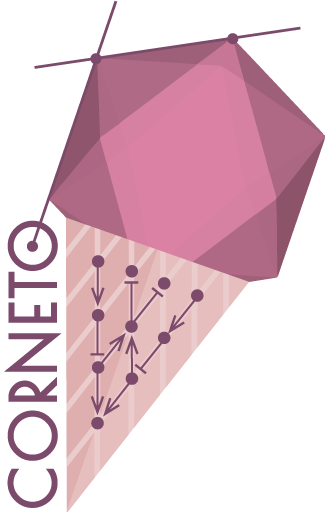

In [1]:
import corneto as cn

cn.info()

## Manually creating a graph

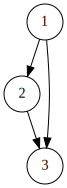

In [2]:
G = cn.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(1, 3)
G.plot()

By default, edges are directed. Undirected edges can be mixed with directed edges. The method `add_edge` returns the index of the new edge. Here is an example:

3


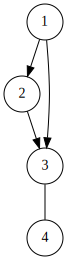

In [3]:
idx = G.add_edge(3, 4, cn.EdgeType.UNDIRECTED)
print(idx)
G.plot()

Parallel edges are also supported. You can add multiple edges, both directed or undirected between vertices:

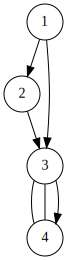

In [4]:
G.add_edge(3, 4, cn.EdgeType.UNDIRECTED)
G.add_edge(3, 4)
G.plot()

## Edge attributes

In [5]:
idx = G.add_edge(3, 4, weight=0.5, label="E(3->4)")
attr = G.get_attr_edge(idx)
attr

{'__edge_type': 'directed',
 'weight': 0.5,
 'label': 'E(3->4)',
 '__source_attr': {3: {'__value': {}}},
 '__target_attr': {4: {'__value': {}}}}

In [6]:
attr.weight

0.5

In [7]:
G.get_attr_edge(idx)

{'__edge_type': 'directed',
 'weight': 0.5,
 'label': 'E(3->4)',
 '__source_attr': {3: {'__value': {}}},
 '__target_attr': {4: {'__value': {}}}}

In [8]:
list(G.get_edges_by_attr("label", "E(3->4)"))

[6]

In [9]:
edge = G.get_edge(idx)
edge

(frozenset({3}), frozenset({4}))

Graphs have some special attributes, starting by `__`, for example `__source_attr` and `__target_attr`. These are automatically added to store attributes between the edge and the vertices. The recommended way to access the special attributes are through the `get_attr` method and the `corneto.Attr` attributes, for example:

In [10]:
attr = G.get_attr_edge(idx)
attr.get_attr(cn.Attr.SOURCE_ATTR)

{3: {'__value': {}}}

In [11]:
attr.__source_attr

{3: {'__value': {}}}

```{note}
The API for handling attributes on graphs is still under development and will change in future versions. It is used mostly internally to transform different representations of prior knowledge.
```

## Importing graphs

CORNETO implements also few adapters to import prior knowledge from other sources as corneto Graphs. For example, when working with signaling networks, one common format is the `SIF` files, which store vertices and edges in triples: `Source Interaction Target`, for example `A -1 B` to indicate that vertex (e.g. protein) A inhibits protein B. When importing a SIF file, CORNETO creates a graph with the attribute `interaction` which stores the type of interaction between vertices. The method `from_sif_tuples` takes a list of these triplets to generate the graph:

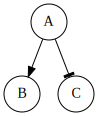

In [12]:
sif_graph = cn.Graph.from_sif_tuples([("A", 1, "B"), ("A", -1, "C")])
sif_graph.plot()

In [13]:
sif_graph.get_attr_edges()

[{'__edge_type': 'directed',
  'interaction': 1,
  '__source_attr': {'A': {'__value': {}}},
  '__target_attr': {'B': {'__value': {}}}},
 {'__edge_type': 'directed',
  'interaction': -1,
  '__source_attr': {'A': {'__value': {}}},
  '__target_attr': {'C': {'__value': {}}}}]

In [14]:
# cn.Graph.from_sif_file()

## Saving and reading

The method `save` allows you...

In [15]:
G.save("my_graph")

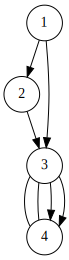

In [16]:
G_c = cn.Graph.load("my_graph.pkl.gz")
G_c.plot()

## Hypergraphs

Graphs in corneto support also hyper-edges connecting sets of vertices, something which is not supported by `networkx`. This is very useful to model more complex prior knowledge, such as metabolic networks, where edges are reactions connecting multiple vertices (reactants and products), e.g., `A + B -> C + D`:

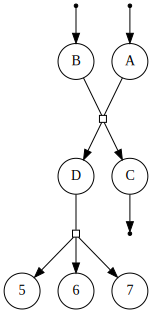

In [17]:
G = cn.Graph()
G.add_edge({"A", "B"}, {"C", "D"})
G.add_edge("D", {5, 6, 7})
G.add_edge((), "A")
G.add_edge((), "B")
G.add_edge("C", ())
G.plot()